In [ ]:
import urllib.request
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")

# move temp file to the data bricks file system (dbfs)
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903


In [ ]:
# read the file and assign it to 4 partitions
#load to RDD
kdd_file= spark.sparkContext.textFile("dbfs:/kdd",4)

In [ ]:
#print first 10 records in the RDD
kdd_file.take(10)

Out[4]: ['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11,79,1.00,0.00,0.09,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,8,89,1.00,0.00,0.12,0.04,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,8,99,1.00,0.00,0.12,0.05,0.00,0.00,0.00,0.00,normal.']

In [ ]:
#confirm type of datastrcuture is RDD
print("Type of data structure is: ",type(kdd_file))

Type of data structure is: <class 'pyspark.rdd.RDD'>

In [ ]:
# number of records
kdd_file.count()

Out[6]: 494021

In [ ]:
kdd_records = kdd_file.map(lambda line: line.split(","))

In [ ]:
print("The count of columns in each record is: ", len(kdd_records.take(1)[0]))

print("However, the last column is the classification label of the traffic as Normal or Attack Type")
print("As such, the number of features is: ", len(kdd_records.take(1)[0])-1)

The count of columns in each record is: 42
However, the last column is the classification label of the traffic as Normal or Attack Type
As such, the number of features is: 41

In [ ]:
#filter of columns using RDD
#The column order is: duration, protocol_type, service, flag, src_bytes, dst_bytes, label

#create new RDD
#determined which columns are which based on http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
kdd_filtered= kdd_records.map(lambda r: [r[i] for i in [0,1,2,3,4,5,41]])

#create new dataframe with col names
kdd_filtered_df = kdd_filtered.toDF(["duration","protocol_type","service","flag","src_bytes","dst_bytes","label"])

In [ ]:
print("Confirm number od records is the same as the original RDD: " , kdd_filtered_df.count())
#show the filtered dataframe first 10 rows
kdd_filtered_df.show(10)

Confirm number od records is the same as the original RDD: 494021
+--------+-------------+-------+----+---------+---------+-------+
duration|protocol_type|service|flag|src_bytes|dst_bytes| label|
+--------+-------------+-------+----+---------+---------+-------+
 0| tcp| http| SF| 181| 5450|normal.|
 0| tcp| http| SF| 239| 486|normal.|
 0| tcp| http| SF| 235| 1337|normal.|
 0| tcp| http| SF| 219| 1337|normal.|
 0| tcp| http| SF| 217| 2032|normal.|
 0| tcp| http| SF| 217| 2032|normal.|
 0| tcp| http| SF| 212| 1940|normal.|
 0| tcp| http| SF| 159| 4087|normal.|
 0| tcp| http| SF| 210| 151|normal.|
 0| tcp| http| SF| 212| 786|normal.|
+--------+-------------+-------+----+---------+---------+-------+
only showing top 10 rows

In [ ]:
#show schema
kdd_filtered_df.printSchema()

root
-- duration: string (nullable = true)
-- protocol_type: string (nullable = true)
-- service: string (nullable = true)
-- flag: string (nullable = true)
-- src_bytes: string (nullable = true)
-- dst_bytes: string (nullable = true)
-- label: string (nullable = true)

In [ ]:
kdd_filtered_df = kdd_filtered_df.withColumn('duration',kdd_filtered_df.duration.cast("double"))
kdd_filtered_df = kdd_filtered_df.withColumn('src_bytes',kdd_filtered_df.src_bytes.cast("int"))
kdd_filtered_df = kdd_filtered_df.withColumn('dst_bytes',kdd_filtered_df.dst_bytes.cast("int"))

In [ ]:
#show updated schema that will allow calculations
kdd_filtered_df.printSchema()

root
-- duration: double (nullable = true)
-- protocol_type: string (nullable = true)
-- service: string (nullable = true)
-- flag: string (nullable = true)
-- src_bytes: integer (nullable = true)
-- dst_bytes: integer (nullable = true)
-- label: string (nullable = true)

In [ ]:
#show the filtered dataframe first 10 rows
kdd_filtered_df.show(10)

+--------+-------------+-------+----+---------+---------+-------+
duration|protocol_type|service|flag|src_bytes|dst_bytes| label|
+--------+-------------+-------+----+---------+---------+-------+
 0.0| tcp| http| SF| 181| 5450|normal.|
 0.0| tcp| http| SF| 239| 486|normal.|
 0.0| tcp| http| SF| 235| 1337|normal.|
 0.0| tcp| http| SF| 219| 1337|normal.|
 0.0| tcp| http| SF| 217| 2032|normal.|
 0.0| tcp| http| SF| 217| 2032|normal.|
 0.0| tcp| http| SF| 212| 1940|normal.|
 0.0| tcp| http| SF| 159| 4087|normal.|
 0.0| tcp| http| SF| 210| 151|normal.|
 0.0| tcp| http| SF| 212| 786|normal.|
+--------+-------------+-------+----+---------+---------+-------+
only showing top 10 rows

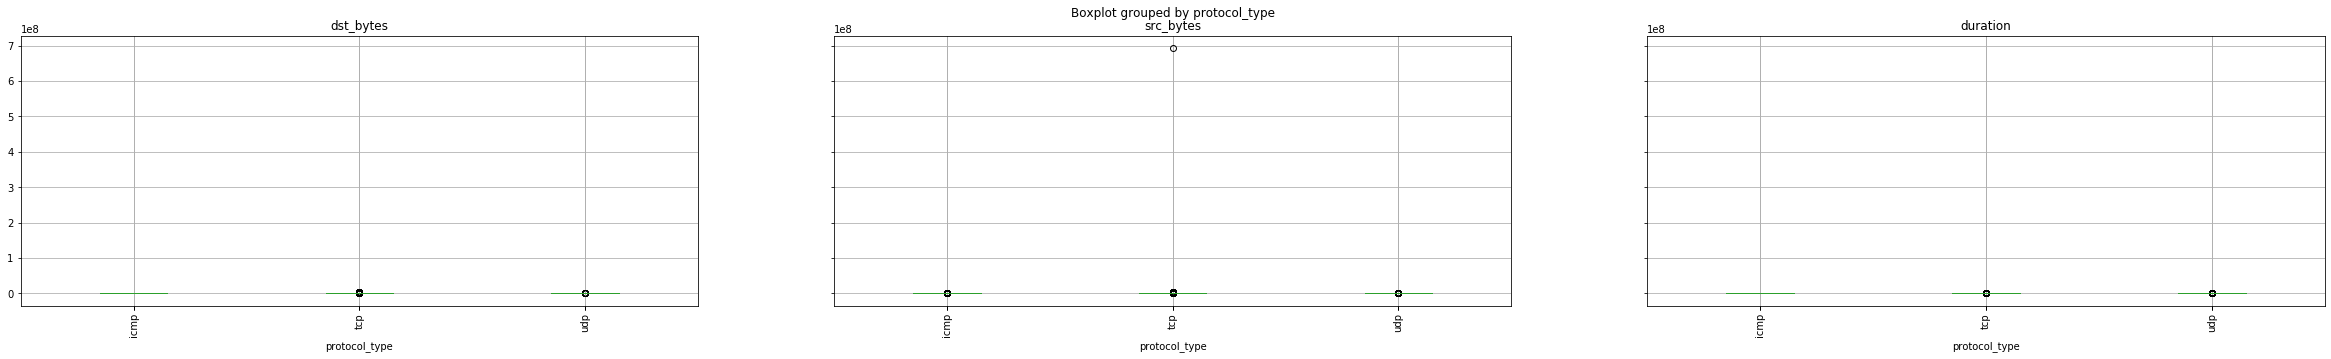

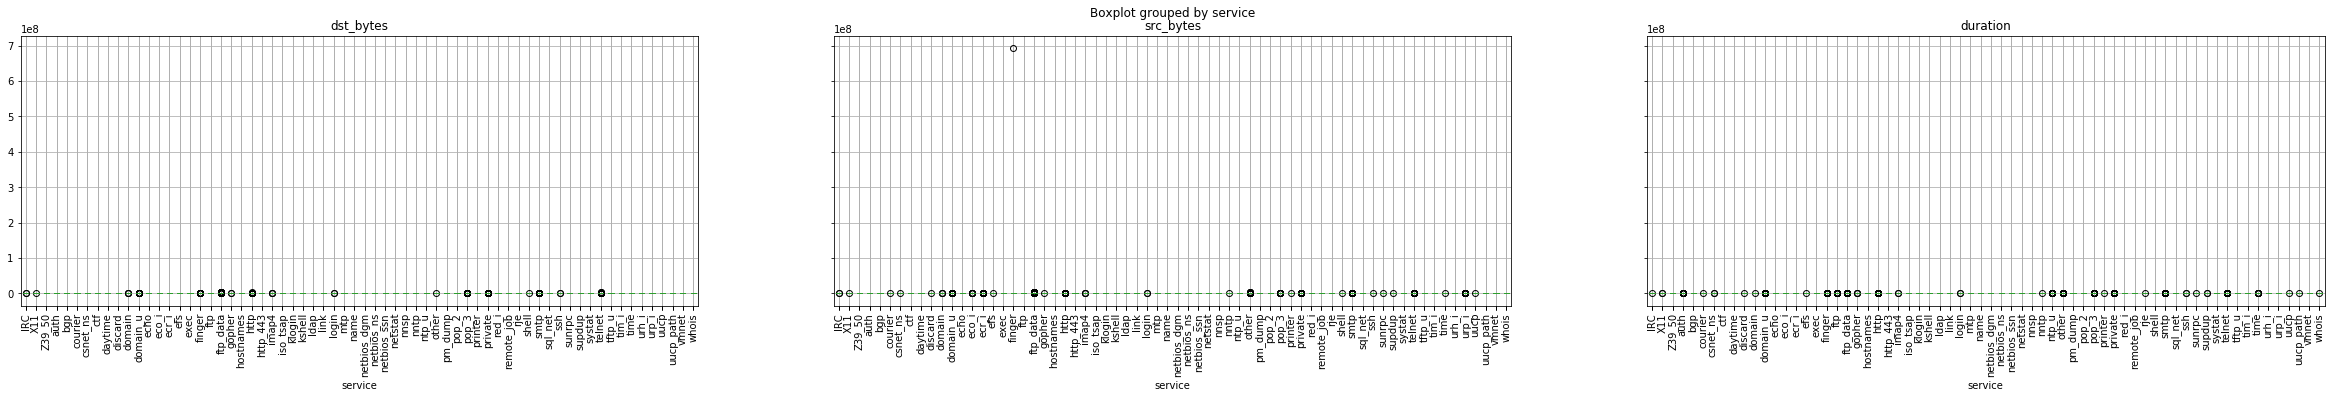

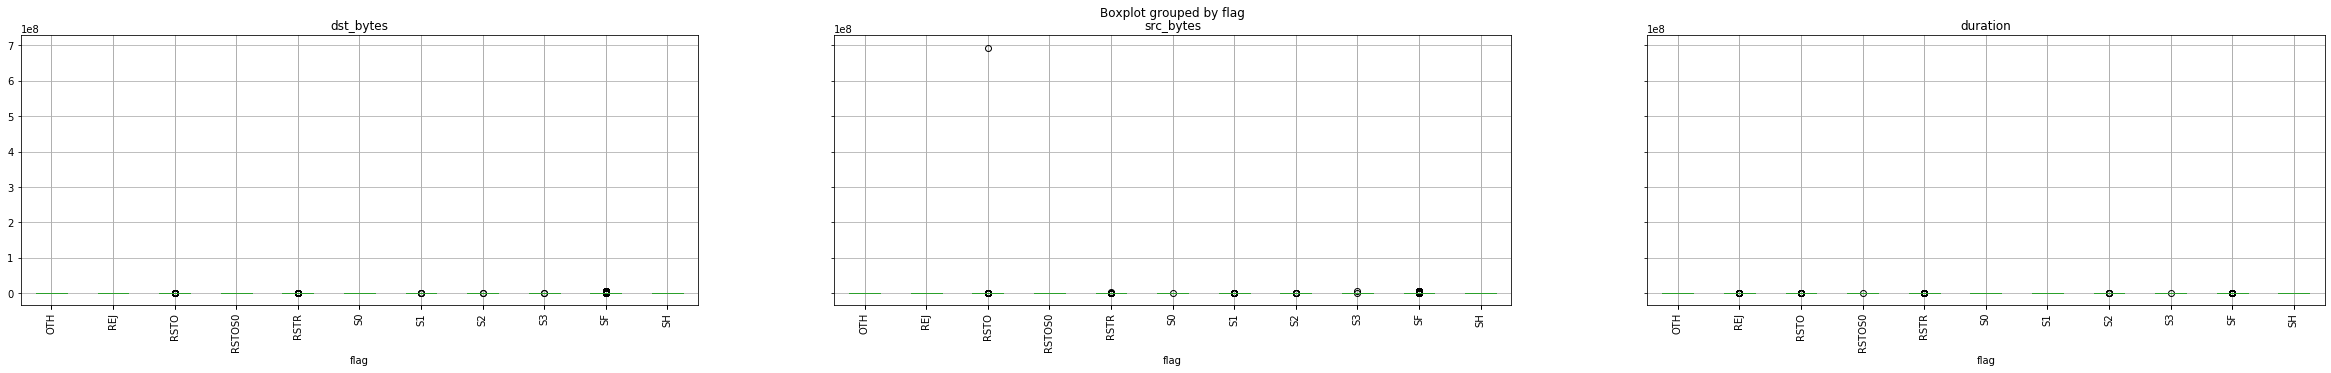

In [ ]:
# plot box plot for each number-based column ["dst_bytes", "src_bytes", "duration"] by each categorical column ["protocol_type","service","flag"]
#the purpose to is to get a sense of outliers in the dataset
for y in ["protocol_type","service","flag"]:
    kdd_df_pandas.boxplot(column=["dst_bytes", "src_bytes", "duration"], by=y, figsize=(40,5),layout=(1,3), rot=90)
    print()
    print()


In [ ]:
from pyspark.sql import functions as F

kdd_filtered_df.groupby("label").agg(((F.count('src_bytes')/kdd_df_pandas.shape[0])*100).alias("Percentage")).sort(['Percentage'],ascending=False).show()

+----------------+--------------------+
 label| Percentage|
+----------------+--------------------+
 smurf.| 56.8376647956261|
 neptune.| 21.69968483121163|
 normal.| 19.691065764410826|
 back.| 0.4459324603609968|
 satan.| 0.32164624580736445|
 ipsweep.| 0.2524184194599015|
 portsweep.| 0.2105173666706476|
 warezclient.| 0.20646895577313512|
 teardrop.| 0.1981697134332346|
 pod.|0.053439023847164396|
 nmap.| 0.04675914586626884|
 guess_passwd.|0.010728288878408003|
buffer_overflow.|0.006072616346268681|
 land.|0.004250831442388077|
 warezmaster.|0.004048410897512454|
 imap.|0.002429046538507...|
 rootkit.|0.002024205448756227|
 loadmodule.|0.001821784903880...|
 ftp_write.|0.001619364359004...|
 multihop.|0.001416943814129359|
+----------------+--------------------+
only showing top 20 rows

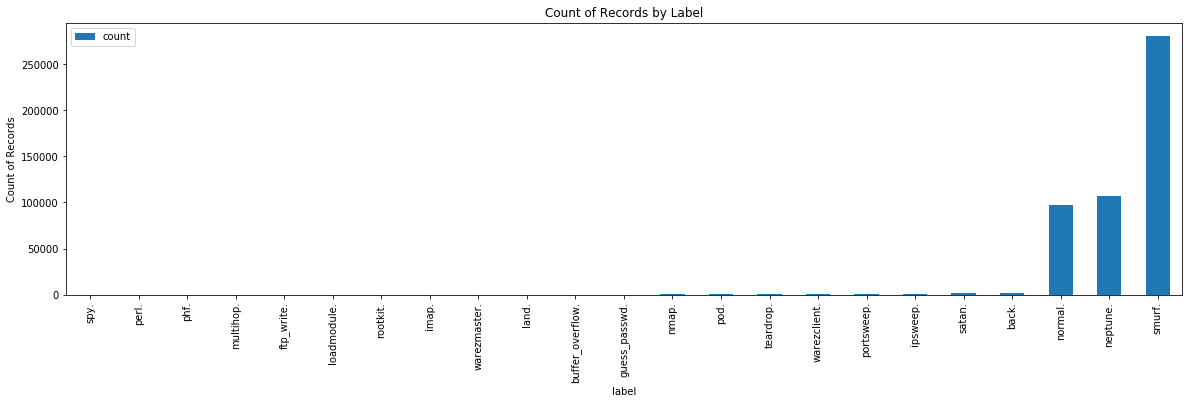

In [ ]:
#get count by label
kdd_df_pandas.groupby("label").agg(count =('src_bytes','count')).sort_values(['count'],ascending=True).plot.bar(title="Count of Records by Label", figsize=(20,5)).set(ylabel="Count of Records")

In [ ]:
# import libraries
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

In [ ]:
#create the new label where if not normal then attack
filter_udf = udf(lambda x: "normal" if x == 'normal.' else "attack", StringType())

kdd_label_df = kdd_filtered_df.withColumn("new_label", filter_udf(kdd_filtered_df.label))

In [ ]:
#prepare feature data by converting the string columns to one hot encoded columns to create the features col which would be the input to the ML model

data_indexers = [StringIndexer(inputCol=col,outputCol= col+"_index").fit(kdd_label_df) for col in ["service","flag","protocol_type"] ]


pipeln_1 = Pipeline(stages=data_indexers)
kdd_label_df_indexed = pipeln_1.fit(kdd_label_df).transform(kdd_label_df)


data_encoders = [OneHotEncoder(inputCol=col+"_index",outputCol= col+"_encoded").fit(kdd_label_df_indexed) for col in ["service","flag","protocol_type"] ]


pipeln_2 = Pipeline(stages=data_encoders)
kdd_label_df_encoded = pipeln_2.fit(kdd_label_df_indexed).transform(kdd_label_df_indexed)

vec_assembler = VectorAssembler(inputCols=["duration","src_bytes","dst_bytes","protocol_type_encoded", "service_encoded","flag_encoded"], outputCol="features")
kdd_label_df_encoded_features = vec_assembler.transform(kdd_label_df_encoded)


# prepare label data and convert to numeric

label_indexer = StringIndexer(inputCol="new_label", outputCol="new_label_indexed")
kdd_label_df_encoded_features_labels =label_indexer.fit(kdd_label_df_encoded_features).transform(kdd_label_df_encoded_features)
kdd_label_df_encoded_features_labels = kdd_label_df_encoded_features_labels.select("features", "new_label_indexed")

In [ ]:
# split data 80-20

split = kdd_label_df_encoded_features_labels.randomSplit([0.8,0.2], 10)
train = split[0]
test = split[1]

In [ ]:
# Build model and fit it to training data
nb = NaiveBayes(labelCol="new_label_indexed")
model = nb.fit(train)

In [ ]:
#predictions on test data
pred = model.transform(test)
pred.show()

+--------------------+-----------------+--------------------+--------------------+----------+
 features|new_label_indexed| rawPrediction| probability|prediction|
+--------------------+-----------------+--------------------+--------------------+----------+
(80,[0,1,2,4,7,70...| 1.0|[-1659.7208536457...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-49174.809078487...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-2548.2536640447...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-5500.9873166500...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-794.41117719738...|[3.79383608082852...| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-3606.0814751959...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-14589.169468640...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 0.0|[-26417.217059464...| [1.0,0.0]| 0.0|
(80,[0,1,2,4,7,70...| 1.0|[-141608.13016537...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-37058.257723421...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-22080.854907561...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-1064.6063863201...|[1.43297069140129...| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-6501.0674791753...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-72873.197842142...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-16625.050973948...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-1021.8258216249...|[3.65821781985824...| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-27068.305348499...| [0.0,1.0]| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-583.27639044626...|[8.15425338837066...| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-895.39308417259...|[4.27364063139935...| 1.0|
(80,[0,1,2,4,7,70...| 1.0|[-15767.803120418...| [0.0,1.0]| 1.0|
+--------------------+-----------------+--------------------+--------------------+----------+
only showing top 20 rows

In [ ]:
#success metric 1 : Accuracy
eval_acc = MulticlassClassificationEvaluator(labelCol="new_label_indexed", predictionCol="prediction", metricName="accuracy")
acc = eval_acc.evaluate(pred)
print("The accuracy is = " , acc)

The accuracy is = 0.9586031475795256

In [ ]:
#success metric 1 : f1 score
eval_f1 = MulticlassClassificationEvaluator(labelCol="new_label_indexed", predictionCol="prediction", metricName="f1")
f1 = eval_f1.evaluate(pred)
print("The f1 score is = " , f1)

The f1 score is = 0.957069709864045